In [1]:
import os
import re
import pathlib
import time
import itertools
import glob
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from IPython import display

from deep_shadow import *
from utils import *

%load_ext autoreload
%autoreload 2

In [2]:
cities = ['la','bos','nyc','chi','sp', 'bue', 'joh', 'syd', 'tok', 'par', 'mex', 'sea', 'aus']
dates = ['winter', 'spring', 'summer']
zoom = 16
shadow_path = 'data/shadows/'
height_path = 'data/heights/'
# checkpoint_name = 'evaluation_new/uniform_cities'
checkpoint_name = 'all-all' # changed to all-all
checkpoint_path = 'training_checkpoints/%s'%(checkpoint_name)
TILES_PER_CITY = 270
BATCH_SIZE = 1

if not os.path.exists('results/'):
    os.mkdir('results/')

In [16]:
deep_shadow = DeepShadow(512,512)
deep_shadow.restore(checkpoint_path)

In [17]:
train_dataset, test_dataset = get_train_test(height_path, shadow_path, cities, dates, zoom, TILES_PER_CITY, BATCH_SIZE)

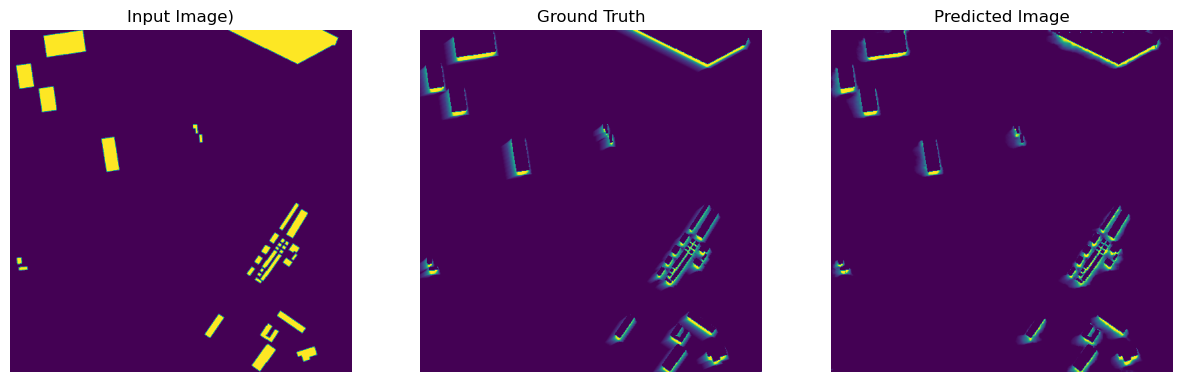

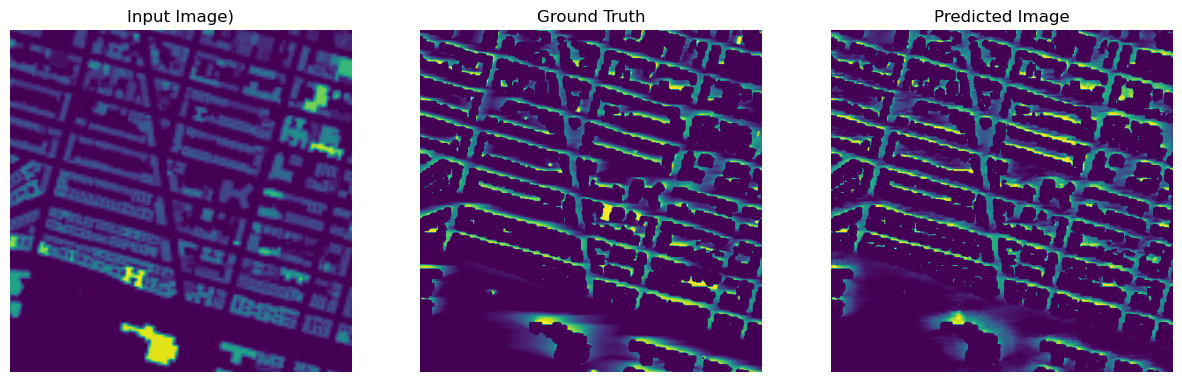

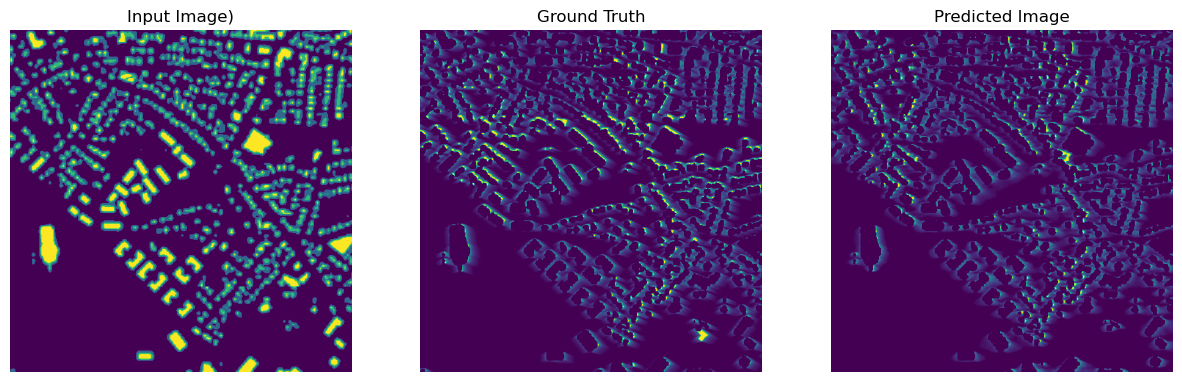

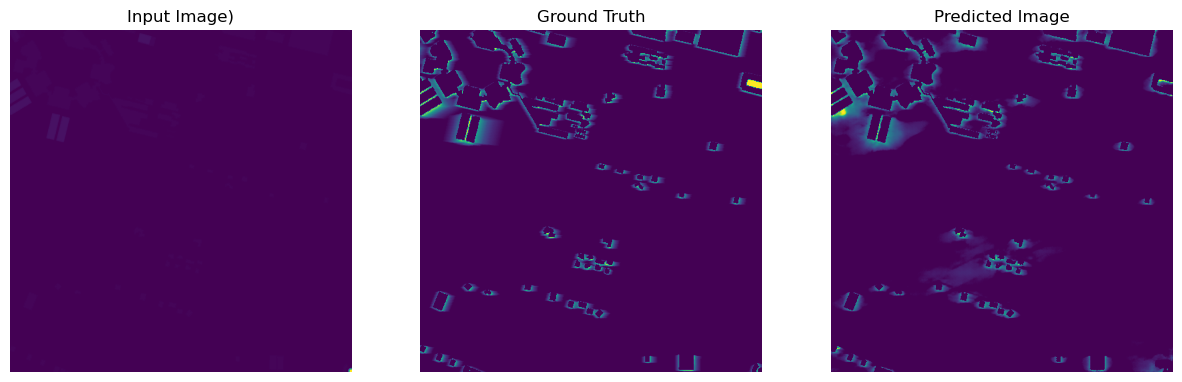

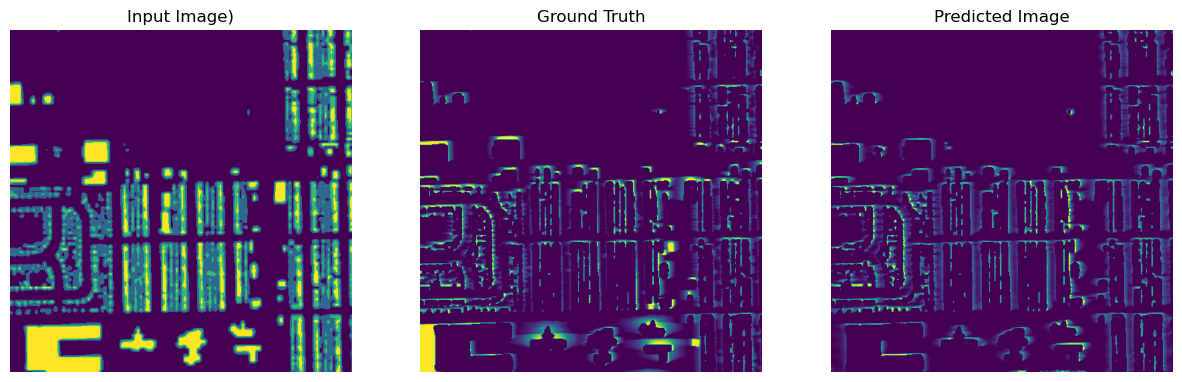

In [18]:
for example_input, example_target, example_lat, example_dat in test_dataset.take(5):
    # print(example_input.shape, example_lat.shape, example_dat.shape)
    generate_images(deep_shadow.generator, example_input, example_lat, example_dat, example_target)

In [21]:
rmses, maes, mses = get_metrics(test_dataset, deep_shadow.generator)
    
print(np.average(rmses), np.average(maes))
df = pd.DataFrame({'rmse': rmses, 'mae': maes})

filepath = 'results/%s-%d.csv'%(checkpoint_name,zoom)
if not os.path.exists(os.path.dirname(filepath)):
    os.mkdir(os.path.dirname(filepath))
        
df.to_csv(filepath, index=False, header=True)

0.07510832 0.02787037
